#  CAR RENTAL PRICES PROJECT

### SET UP THE PYTHON ENVIRONMENT

In [4]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### LOAD AND EXPLORE THE DATASET

In [5]:
df = pd.read_csv('CarRentalData.csv')
df.describe()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

In [7]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


### DATA CLEANING AND PREPROCESSING

#### HANDLING MISSING VALUES

In [8]:
df.isnull().sum()

fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64

### Fill the missing values with the mode in 'fueltype'

In [9]:
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].mode()[0])
df.isnull().sum()

fuelType                0
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64

### Fill the missing values with a 0 in 'rating' 

"I decided to check the database for ratings with a value of 0. After reviewing the dataset, I found that there were no ratings with a value of 0. I then assumed that the missing values for ratings correspond to entries with a 0 rating."



In [10]:
zero_ratings_count = df[df['rating'] == 0].shape[0]
zero_ratings_count

0

In [11]:
df['rating'] = df['rating'].fillna(0)
df.isnull().sum()

fuelType              0
rating                0
renterTripsTaken      0
reviewCount           0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
dtype: int64

#### ENSURE DATA TYPES

"I changed the data types from 'object' to 'category' to optimize memory usage."



In [12]:
df.dtypes

fuelType               object
rating                float64
renterTripsTaken        int64
reviewCount             int64
location.city          object
location.country       object
location.latitude     float64
location.longitude    float64
location.state         object
owner.id                int64
rate.daily              int64
vehicle.make           object
vehicle.model          object
vehicle.type           object
vehicle.year            int64
dtype: object

In [13]:
df['fuelType'] = df['fuelType'].astype('category')
df['location.city'] = df['location.city'].astype('category')
df['location.country'] = df['location.country'].astype('category')
df['location.state'] = df['location.state'].astype('category')
df['vehicle.make'] = df['vehicle.make'].astype('category')
df['vehicle.model'] = df['vehicle.model'].astype('category')
df['vehicle.type'] = df['vehicle.type'].astype('category')

df.dtypes

fuelType              category
rating                 float64
renterTripsTaken         int64
reviewCount              int64
location.city         category
location.country      category
location.latitude      float64
location.longitude     float64
location.state        category
owner.id                 int64
rate.daily               int64
vehicle.make          category
vehicle.model         category
vehicle.type          category
vehicle.year             int64
dtype: object

### EXPLORATORY DATA ANALYSIS (EDA)

#### Car Models Popularity

In [14]:
car_make_popularity = df.groupby('vehicle.make', observed=False)['renterTripsTaken'].sum().sort_values(ascending=False)
car_make_popularity

vehicle.make
Toyota           26857
Tesla            18029
Chevrolet        16486
BMW              16100
Ford             13941
Nissan           10909
Honda            10587
Mercedes-Benz     9745
Jeep              9654
Porsche           8331
Hyundai           5859
Dodge             5433
Kia               4737
Audi              4572
Lexus             3935
Volkswagen        3748
Mazda             2671
Subaru            2625
Land Rover        1932
Jaguar            1906
FIAT              1819
Maserati          1574
Chrysler          1509
GMC               1422
Alfa Romeo        1040
Acura             1037
Mitsubishi        1013
MINI               930
Polaris            924
Scion              901
Mercedes-benz      890
Infiniti           678
Buick              535
Cadillac           480
smart              458
Volvo              312
Lincoln            258
Ferrari            255
Suzuki             231
Pontiac            228
Lamborghini        213
Alfa-romeo         208
INFINITI           19

In [15]:
car_model_popularity = df.groupby(['vehicle.make', 'vehicle.model'], observed=False)['renterTripsTaken'].sum().sort_values(ascending=False)
car_model_popularity

vehicle.make  vehicle.model
Tesla         Model 3          10187
Ford          Mustang           5940
Toyota        Corolla           5862
Jeep          Wrangler          4979
Chevrolet     Corvette          4504
                               ...  
Acura         86                   0
              911                  0
              A3                   0
              A4                   0
smart         X5 eDrive            0
Name: renterTripsTaken, Length: 28404, dtype: int64

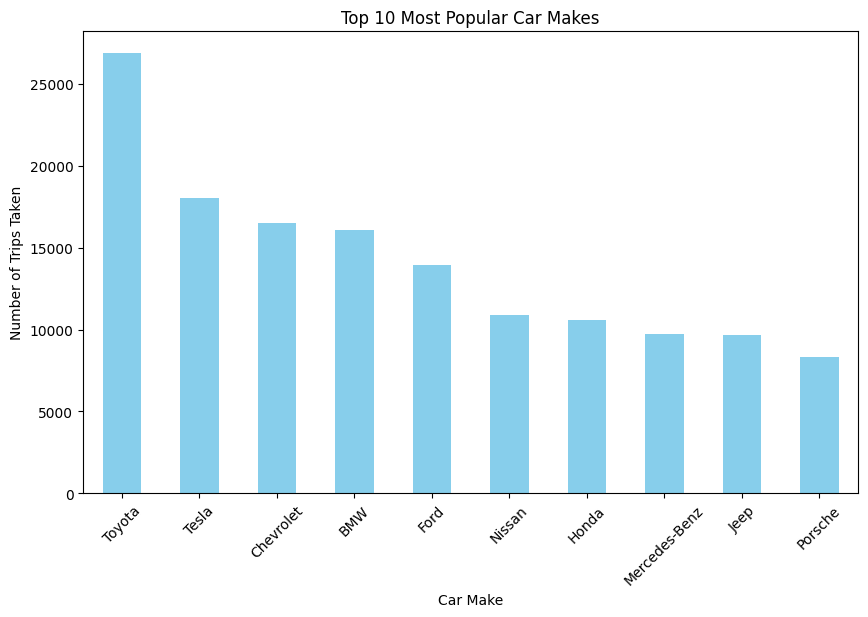

In [16]:

plt.figure(figsize=(10, 6))
car_make_popularity.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular Car Makes")
plt.xlabel("Car Make")
plt.ylabel("Number of Trips Taken")
plt.xticks(rotation=45)
plt.show()


"As we can observe, the most popular car make is Toyota."








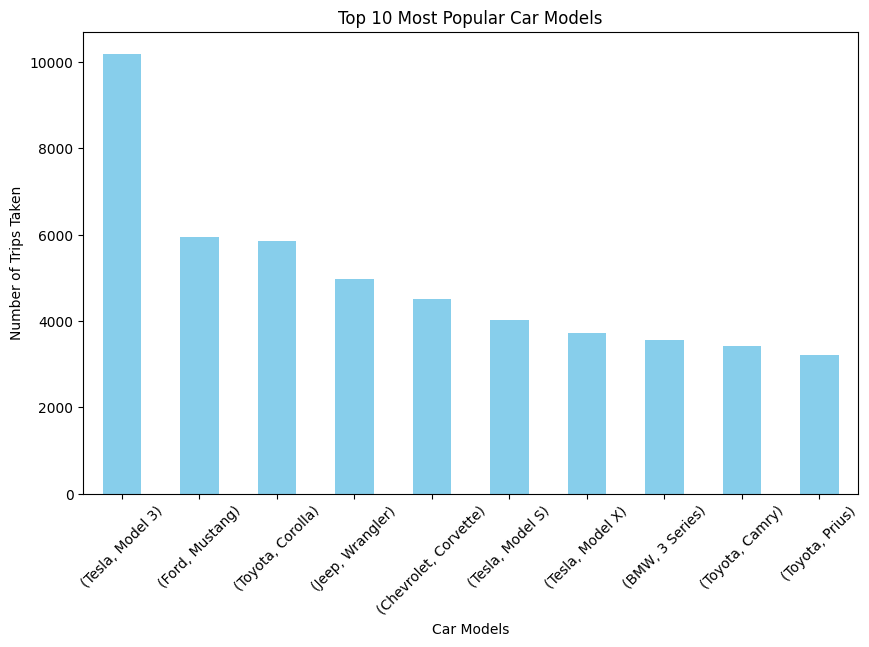

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
car_model_popularity.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular Car Models")
plt.xlabel("Car Models")
plt.ylabel("Number of Trips Taken")
plt.xticks(rotation=45)
plt.show()

As we can observe, the most popular car model is Tesla, Model 3.

#### Price Trends

#### What are the average rental prices for different car models and fuel types (e.g., electric, gasoline, hybrid)?

In [18]:
avg_price_by_model = df.groupby(['vehicle.make', 'vehicle.model'], observed=True)['rate.daily'].mean().sort_values(ascending=False)
avg_price_by_model


vehicle.make  vehicle.model 
Ferrari       488GTB            1099.000000
Rolls Royce   Ghost             1049.500000
Lamborghini   Huracan           1038.555556
              Urus               924.500000
Ferrari       488 Spider         899.000000
                                   ...     
Chevrolet     Impala Limited      27.000000
Dodge         Caliber             26.500000
Saturn        ION                 26.000000
Kia           Spectra             23.000000
Chevrolet     Aveo                22.000000
Name: rate.daily, Length: 541, dtype: float64

In [19]:
avg_price_by_fuel = df.groupby('fuelType', observed=True)['rate.daily'].mean().sort_values(ascending=False)
avg_price_by_fuel

fuelType
ELECTRIC    141.967846
DIESEL       92.885714
GASOLINE     88.062436
HYBRID       84.664234
Name: rate.daily, dtype: float64

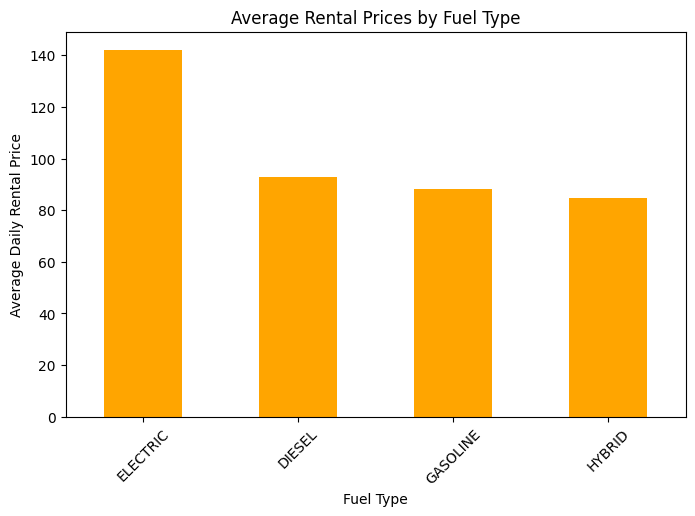

In [20]:
plt.figure(figsize=(8, 5))
avg_price_by_fuel.plot(kind='bar', color='orange')
plt.title("Average Rental Prices by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Daily Rental Price")
plt.xticks(rotation=45)
plt.show()

This bar chart shows the average rental prices by fuel type.

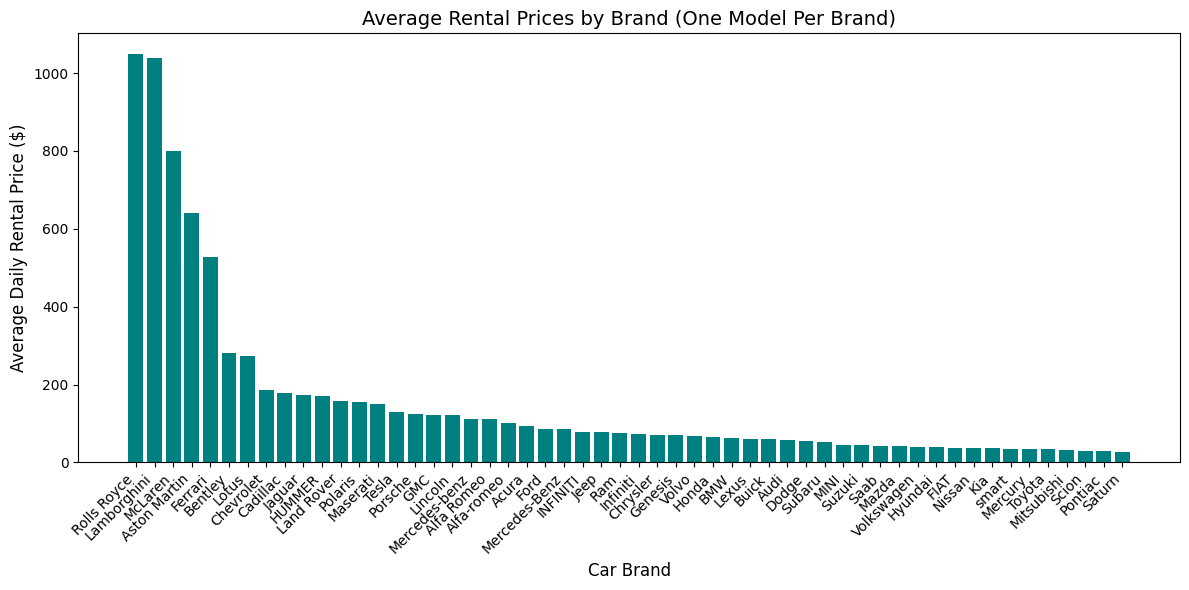

In [49]:
most_common_models = df.groupby('vehicle.make', observed=False)['vehicle.model'].agg(lambda x: x.mode()[0])
representative_models = df[df['vehicle.model'].isin(most_common_models.values)]

avg_price_by_brand_model = representative_models.groupby(['vehicle.make', 'vehicle.model'], observed=False)['rate.daily'].mean().reset_index()
avg_price_by_brand_model = avg_price_by_brand_model.sort_values(by='rate.daily', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_brand_model['vehicle.make'], avg_price_by_brand_model['rate.daily'], color='teal')



plt.title("Average Rental Prices by Brand (One Model Per Brand)", fontsize=14)
plt.xlabel("Car Brand", fontsize=12)
plt.ylabel("Average Daily Rental Price ($)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

This bar chart shows the average rental price by brand (one model per brand)

#### Is there a significant price between electric, hybrid, and gasoline vehicles?

In [54]:
avg_price_by_fuel_type = df.groupby('fuelType', observed=False)['rate.daily'].mean().reset_index()
avg_price_by_fuel_type.columns = ['Fuel Type', 'Average Daily Rental Price']
avg_price_by_fuel_type = avg_price_by_fuel_type.sort_values(by='Average Daily Rental Price', ascending=False)



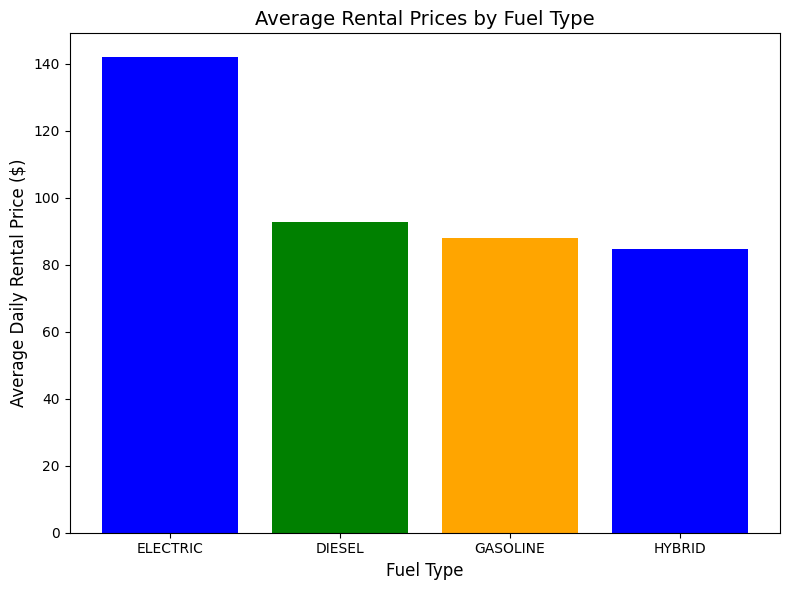

In [53]:
plt.figure(figsize=(8, 6))
plt.bar(avg_price_by_fuel_type['Fuel Type'], avg_price_by_fuel_type['Average Daily Rental Price'], color=['blue', 'green', 'orange'])
plt.title('Average Rental Prices by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Daily Rental Price ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

"Electric cars have the highest average rental prices compared to the others. Diesel cars come next, followed by gasoline vehicles and hybrids, with the last three having similar rental prices."



#### Geographic Trends

#### Which cities have the highes demand for electric cars (Tesla)?

In [24]:
tesla_electric = df[(df['vehicle.make'] == 'Tesla') & (df['fuelType'] == 'ELECTRIC')]
tesla_city_demand = tesla_electric.groupby('location.city', observed=False)['renterTripsTaken'].sum().sort_values(ascending=False)
tesla_city_demand

location.city
Las Vegas        1445
San Diego        1217
San Francisco     956
Los Angeles       829
Portland          779
                 ... 
Union City          0
Upland              0
Upper Darby         0
Titusville          0
Auburn              0
Name: renterTripsTaken, Length: 971, dtype: int64

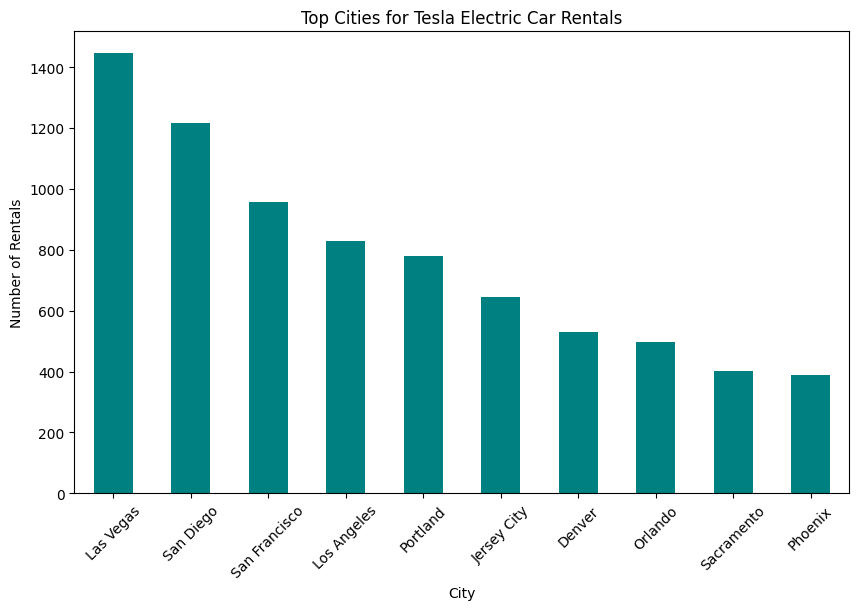

In [25]:
tesla_city_demand.head(10).plot(kind='bar', figsize=(10, 6), color='teal')
plt.title("Top Cities for Tesla Electric Car Rentals")
plt.xlabel("City")
plt.ylabel("Number of Rentals")
plt.xticks(rotation=45)
plt.show()

Based on the data presented in the chart, the cities with the highest demand for electric cars (specifically Tesla rentals) are Las Vegas, San Diego, and San Francisco. Las Vegas leads with the highest number of rentals, followed closely by San Diego and San Francisco. These cities show the greatest rental activity for Tesla electric cars, with Las Vegas standing out as the top location.

#### Are specific vehicle types more popular in certain regions?

In [26]:
vehicle_popularity_by_region = df.groupby(['location.state', 'vehicle.type'], observed=False)['renterTripsTaken'].sum().reset_index()
popular_vehicle_types = vehicle_popularity_by_region.sort_values(['location.state', 'renterTripsTaken'], ascending=[True, False])

popular_vehicle_types

,location.state,vehicle.type,renterTripsTaken
2,AK,suv,568
0,AK,car,155
3,AK,truck,56
4,AK,van,44
1,AK,minivan,24
...,...,...,...
225,WV,car,76
226,WV,minivan,0
227,WV,suv,0
228,WV,truck,0


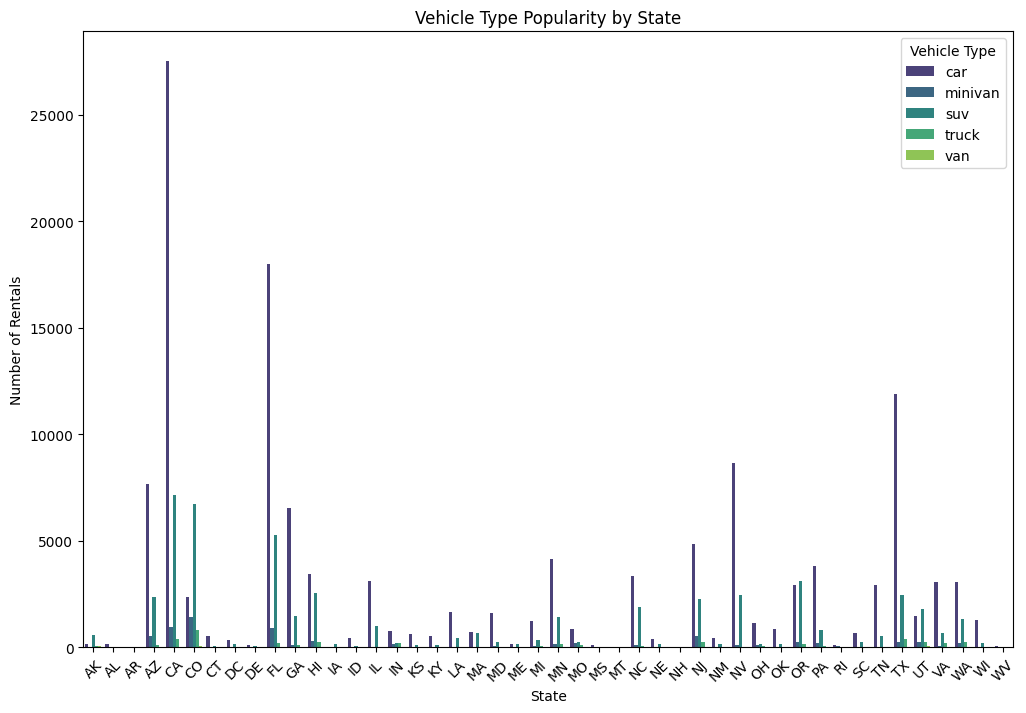

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data=popular_vehicle_types, x='location.state', y='renterTripsTaken', hue='vehicle.type', palette='viridis')
plt.title("Vehicle Type Popularity by State")
plt.xlabel("State")
plt.ylabel("Number of Rentals")
plt.xticks(rotation=45)
plt.legend(title="Vehicle Type")
plt.show()

Based on the data presented in the chart, California (CA) has the highest demand for car rentals and SUVs, reflecting a strong preference for these vehicle types in the state. Colorado (CO), on the other hand, leads in the demand for minivans and trucks, indicating a specific preference for these vehicle types in this region. Meanwhile, the demand for van rentals is relatively low across all states, suggesting that this vehicle type is less popular among renters overall.

#### Revenue Generation

#### Which car models generate the most revenue per rental day on average?

In [ ]:
avg_revenue_by_model = df.groupby(['vehicle.make', 'vehicle.model'], observed=False)['rate.daily'].mean().sort_values(ascending=False)

avg_revenue_by_model

vehicle.make  vehicle.model
Ferrari       488GTB           1099.000000
Rolls Royce   Ghost            1049.500000
Lamborghini   Huracan          1038.555556
              Urus              924.500000
Ferrari       488 Spider        899.000000
Name: rate.daily, dtype: float64

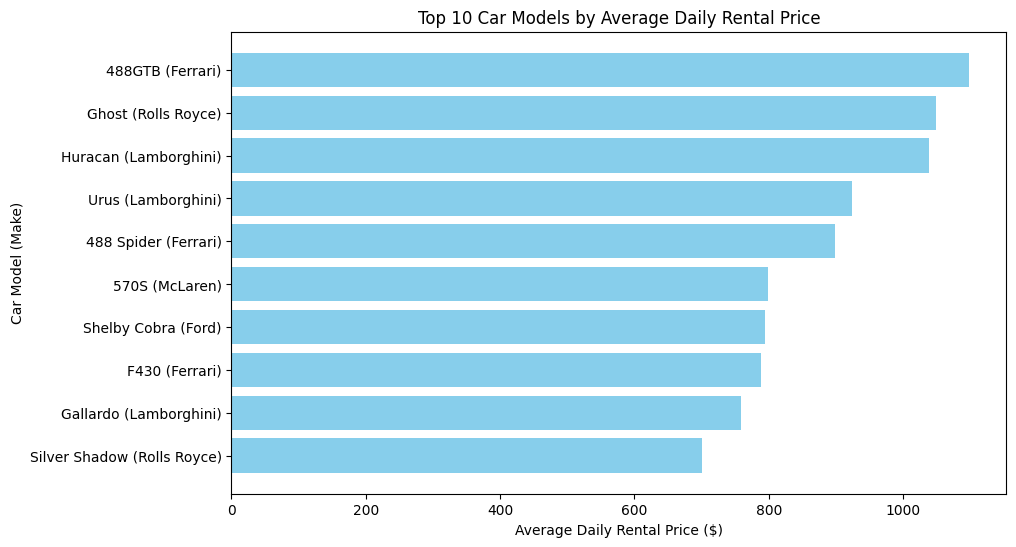

In [66]:
top_models_reset = avg_revenue_by_model.reset_index()
top_models_reset.head()

top_n = 10
top_models = top_models_reset.head(top_n).copy()
top_models['Car Model'] = top_models['vehicle.model'].astype(str) + " (" + top_models['vehicle.make'].astype(str) + ")"

plt.figure(figsize=(10, 6))
plt.barh(top_models['Car Model'], top_models['rate.daily'], color='skyblue')
plt.xlabel('Average Daily Rental Price ($)')
plt.ylabel('Car Model (Make)')
plt.title(f'Top {top_n} Car Models by Average Daily Rental Price')
plt.gca().invert_yaxis()
plt.show()

As observed, the car models that generate the most revenue per rental day on average are the Ferrari 488GTB, the Rolls Royce Ghost, and the Lamborghini Huracan

#### Customer Behavior

#### Is there a correlation between the number of reviews and the average rental rating?

In [29]:
correlation = df['reviewCount'].corr(df['rating'])
correlation

np.float64(0.2409918762485735)

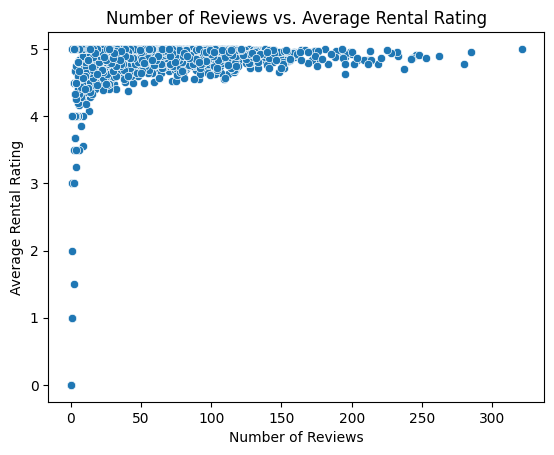

In [30]:

sns.scatterplot(data=df, x='reviewCount', y='rating')
plt.title('Number of Reviews vs. Average Rental Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rental Rating')
plt.show()


The scatter plot shows no strong correlation between the number of reviews and the average rental rating. Most properties maintain high average ratings (close to 5) regardless of their review count, indicating that the volume of reviews does not significantly impact the rating.

### ADVANCED ANALYTICS

#### Linear Regression : Rental Price vs. Vehicle Year

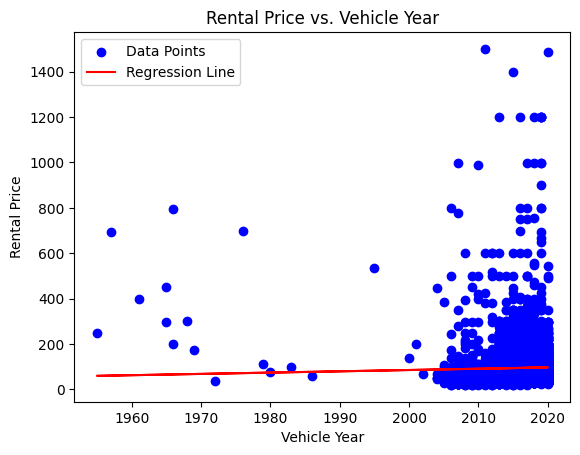

0.0038318022777609206

In [31]:


df = df.dropna(subset=['rate.daily', 'vehicle.year'])
X = df[['vehicle.year']]
y = df['rate.daily']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


intercept = model.intercept_
coefficient = model.coef_[0]

y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Rental Price vs. Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Rental Price')
plt.legend()
plt.show()

r_squared = model.score(X_test, y_test)
r_squared

The linear regression analysis of rental price vs. vehicle year reveals an R squared value of 0.0038, indicating that vehicle year accounts for only 0.38% of the variance in rental price. This suggests an extremely weak or negligible relationship between the age of the vehicle and its rental price. The scatter plot and regression line further illustrate this, with data points showing high variability across all vehicle years

### FORMULATE RECOMMENDATIONS

#### Suggest popular car models to stock based on rental trends.

In [32]:
toyota_cars = df[df['vehicle.make'] == 'Toyota']
toyota_model_popularity = toyota_cars.groupby('vehicle.model', observed=False)['renterTripsTaken'].sum().sort_values(ascending=False)
toyota_model_popularity

vehicle.model
Corolla                 5862
Camry                   3414
Prius                   3213
Sienna                  2479
Yaris                   2399
                        ... 
iM                         0
mustang                    0
tC                         0
xB                         0
124 Convertible 2000       0
Name: renterTripsTaken, Length: 526, dtype: int64

In [33]:
toyota_high_rating = toyota_cars[toyota_cars['rating'] > 4.5]
toyota_high_rating_count = toyota_high_rating.groupby('vehicle.model', observed=False).size().sort_values(ascending=False)
toyota_high_rating_count

vehicle.model
Corolla                 93
Camry                   71
Prius                   67
Sienna                  46
Yaris                   42
                        ..
iM                       0
mustang                  0
tC                       0
xB                       0
124 Convertible 2000     0
Length: 526, dtype: int64

In [34]:
tesla_high_rating = df[(df['vehicle.make'] == 'Tesla') & (df['rating'] > 4.5)]
tesla_high_rating_count = tesla_high_rating.groupby('vehicle.model', observed=False).size().sort_values(ascending=False)
tesla_high_rating_count

vehicle.model
Model 3                 301
Model S                 123
Model X                 105
Model Y                  16
2-Series                  0
                       ... 
iM                        0
mustang                   0
tC                        0
xB                        0
124 Convertible 2000      0
Length: 526, dtype: int64

In [35]:
chevrolet_high_rating = df[(df['vehicle.make'] == 'Chevrolet') & (df['rating'] > 4.5)]
chevrolet_high_rating_count = chevrolet_high_rating.groupby('vehicle.model', observed=False).size().sort_values(ascending=False)
chevrolet_high_rating_count

vehicle.model
Corvette                73
Camaro                  66
Cruze                   28
Suburban                28
Equinox                 27
                        ..
iM                       0
mustang                  0
tC                       0
xB                       0
124 Convertible 2000     0
Length: 526, dtype: int64

From the top 3 most popular cars, the cars' models suggested are: Toyota Corolla, Tesla Model 3, and Chevrolet Corvette.

### Recommend marketing strategies to promote underutilized vehicles

1. Targeted Promotions
    - Dynamic Pricing: Offer discounts or special rates for vehicles with low rental frequency during off-peak periods to attract budget-concious customers.
    - Bundling Offers: Create packages where customers receive perks like extra mileage, free GPS, or additional rental days when they choose underutilized models.

2. Enhanced Visibility
    - Social Media Campaigns: Utilize platforms like Instagram, Facebook, and Twitter to showcase the
    - Influencer Marketing: Partner with social media influencers to promote underutilized vehicles.
    - User-Generated Content: Encourage customers to share their experiences with underutilized vehicles.

3. Geo-Targeted Advertising
    - Google Ads: Utilize Google Ads to target customers in specific locations where underutilized vehicles.

4. Customer Education
    - Fuel Efficiency Campaigns: Promote the benefits of hybrid and electric vehicles (if underutilized) by emphasizing cosst savings and environmental advantages.
    - Test Drive Events: Allow potential customers to experience these cars at promotional events.

5. Loyalty Incentives
    - Offer bonus loyalty points or discounts on future rentals for customers who choose underutilized models.

### Are there opportunities to optimize pricing strategies or introduce more hybrid vehicles in certain cities?

In [38]:
# Breakdown of Rental Demand by City and Fuel Type
city_fuel_demand = df.groupby(['location.city', 'fuelType'], observed=True).size().reset_index(name='count')
city_fuel_demand


,location.city,fuelType,count
0,Aberdeen Township,GASOLINE,3
1,Addison,GASOLINE,4
2,Addison,HYBRID,2
3,Aiea,GASOLINE,5
4,Aiea,HYBRID,1
...,...,...,...
1372,orlando,GASOLINE,2
1373,portland,HYBRID,1
1374,san diego,GASOLINE,1
1375,tempe,GASOLINE,1


In [55]:
# Average Daily Rental Rates
avg_daily_rates = df.groupby(['location.city', 'fuelType'], observed=False)['rate.daily'].mean().reset_index()
avg_daily_rates

,location.city,fuelType,rate.daily
0,Aberdeen Township,DIESEL,NaN
1,Aberdeen Township,ELECTRIC,NaN
2,Aberdeen Township,GASOLINE,112.666667
3,Aberdeen Township,HYBRID,NaN
4,Addison,DIESEL,NaN
...,...,...,...
3879,tempe,HYBRID,NaN
3880,windermere,DIESEL,NaN
3881,windermere,ELECTRIC,NaN
3882,windermere,GASOLINE,182.000000


In [40]:
# Cities with Low Hybrid Demand
low_hybrid_demand = city_fuel_demand[(city_fuel_demand['fuelType'] == 'HYBRID') & (city_fuel_demand['count'] < 5)]
low_hybrid_demand

,location.city,fuelType,count
2,Addison,HYBRID,2
4,Aiea,HYBRID,1
8,Alameda,HYBRID,3
11,Albuquerque,HYBRID,3
28,Anchorage,HYBRID,3
...,...,...,...
1349,Windsor,HYBRID,1
1353,Winter Garden,HYBRID,1
1368,denver,HYBRID,1
1369,east point,HYBRID,1


In [41]:
# Cities with Missing Hybrid Rates
missing_hybrid_rates = avg_daily_rates[(avg_daily_rates['fuelType'] == 'HYBRID') & avg_daily_rates['rate.daily'].isna()]
missing_hybrid_rates

,location.city,fuelType,rate.daily
3,Aberdeen Township,HYBRID,NaN
15,Airway Heights,HYBRID,NaN
19,Akron,HYBRID,NaN
31,Aldie,HYBRID,NaN
35,Alexander,HYBRID,NaN
...,...,...,...
3863,nashville,HYBRID,NaN
3867,orlando,HYBRID,NaN
3875,san diego,HYBRID,NaN
3879,tempe,HYBRID,NaN


In [42]:
# Cities with High Electric Vehicle Demand
high_ev_demand = city_fuel_demand[(city_fuel_demand['fuelType'] == 'ELECTRIC') & (city_fuel_demand['count'] > 5)]
high_ev_demand

,location.city,fuelType,count
47,Atlanta,ELECTRIC,9
216,Chicago,ELECTRIC,6
310,Denver,ELECTRIC,11
596,Jersey City,ELECTRIC,11
666,Las Vegas,ELECTRIC,34
710,Los Angeles,ELECTRIC,12
930,Orlando,ELECTRIC,12
979,Phoenix,ELECTRIC,10
1006,Portland,ELECTRIC,16
1078,Sacramento,ELECTRIC,9


In [43]:
# Pricing Strategy Optimization
comparison = avg_daily_rates.pivot(index='location.city', columns='fuelType', values='rate.daily')
comparison

fuelType,DIESEL,ELECTRIC,GASOLINE,HYBRID
location.city,,,,
Aberdeen Township,NaN,NaN,112.666667,NaN
Addison,NaN,NaN,26.250000,30.5
Aiea,NaN,NaN,69.400000,49.0
Airway Heights,NaN,NaN,81.000000,NaN
Akron,NaN,NaN,36.500000,NaN
...,...,...,...,...
orlando,NaN,NaN,82.000000,NaN
portland,NaN,NaN,NaN,45.0
san diego,NaN,NaN,49.000000,NaN


<Figure size 1200x800 with 0 Axes>

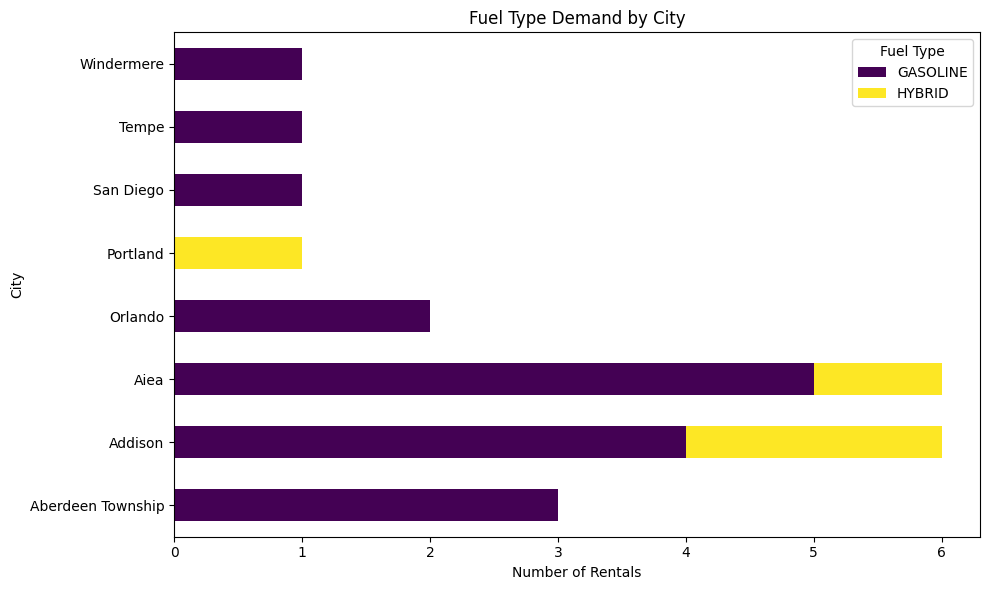

<Figure size 1200x800 with 0 Axes>

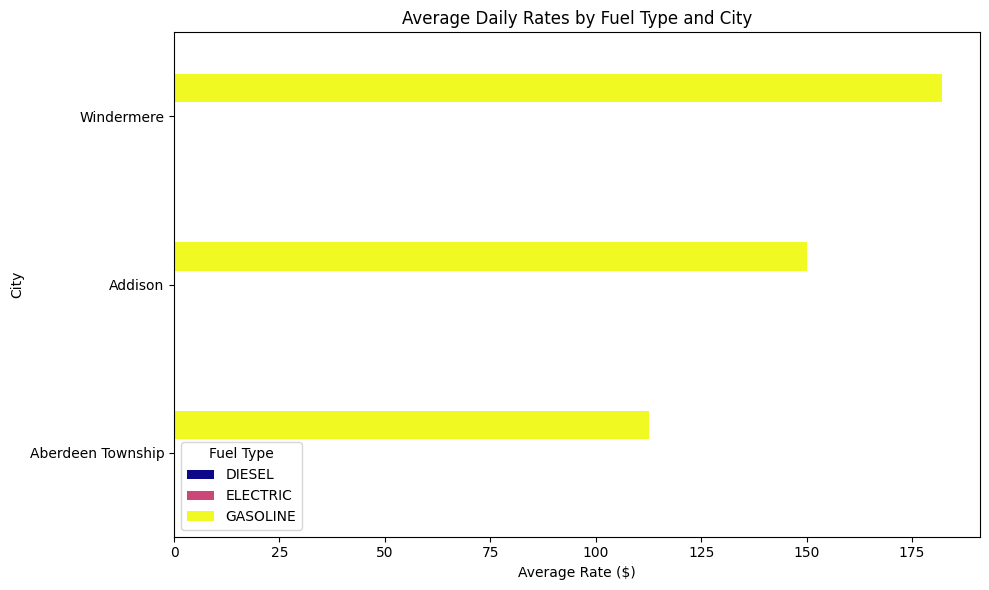

In [46]:
# Visualization for Insights
# Fuel Type Demand by City
city_fuel_demand = pd.DataFrame({
    'location.city': ['Aberdeen Township', 'Addison', 'Addison', 'Aiea', 'Aiea', 'Orlando', 'Portland', 'San Diego', 'Tempe', 'Windermere'],
    'fuelType': ['GASOLINE', 'GASOLINE', 'HYBRID', 'GASOLINE', 'HYBRID', 'GASOLINE', 'HYBRID', 'GASOLINE', 'GASOLINE', 'GASOLINE'],
    'count': [3, 4, 2, 5, 1, 2, 1, 1, 1, 1]
})
city_fuel_pivot = city_fuel_demand.pivot(index='location.city', columns='fuelType', values='count').fillna(0)
plt.figure(figsize=(12, 8))
city_fuel_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), cmap="viridis")
plt.title('Fuel Type Demand by City')
plt.xlabel('Number of Rentals')
plt.ylabel('City')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

# Average Rates by Fuel Type
avg_daily_rates = pd.DataFrame({
    'location.city': ['Aberdeen Township', 'Aberdeen Township', 'Aberdeen Township', 'Addison', 'Addison', 'Windermere', 'Windermere', 'Windermere'],
    'fuelType': ['DIESEL', 'ELECTRIC', 'GASOLINE', 'DIESEL', 'GASOLINE', 'DIESEL', 'ELECTRIC', 'GASOLINE'],
    'rate.daily': [None, None, 112.67, None, 150.00, None, None, 182.00]
})
avg_rate_pivot = avg_daily_rates.pivot(index='location.city', columns='fuelType', values='rate.daily')
plt.figure(figsize=(12, 8))
avg_rate_pivot.plot(kind='barh', figsize=(10, 6), cmap="plasma")
plt.title('Average Daily Rates by Fuel Type and City')
plt.xlabel('Average Rate ($)')
plt.ylabel('City')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


1. Identify Cities with Untapped Hybrid Demand
    - Cities like Addison and Aiea have low hybrid rentals, despite having notable gasoline demand. This suggests a potential opportunity to promote hybrids in these cities by:
        - Offering incentives for hybrid purchases or rentals
        - Highlighting environmental benefits or fuel efficiency to attract renters.
- Opportunity: Increase hybrid awareness and adoption in cities with low hybrid counts but existing rental activity.

2. Adjust Pricing for Hybrids in Key Cities
    - For cities like Aberdeen Township, hybrids have no recorded rental rate data, while gasoline vehicles have a significant rate of $112.67.
    - In Windermere, hybrids are absent, but gasoline vehicles are priced at $182.00. Introducing hybrids here could offer a competitive alternative at a slightly lower rate to attract budget.conscious customers.
- Opportunity: Set competitive hybrid pricing in cities where gasoline vehicles dominate and hybrids are absent or underpriced.

3. Leverage Strong Electric Vehicle Demand
    - Cities like Seattle and potentially other environmentally conscious areas likely have high demand for electric vehicles. These locations are ideal for introducing more hybrids, as customers already show interest in eco-friendly options.
- Opportunity: Expand hybrid inventory in citites with proven electric vehicle demand, pairing hybrids as a cost-effective and a transitional alternative to fully electric vehicles.

4. Dynamic Pricing for Hybrids
    - Cities with high gasoline demand, like Addison, could benefit from dynamic pricing for hybrids.
    - For premium markets, hybrids can be positioned as a cost-effective yet environmentally friendly choice.
- Opportunity: Use dynamic pricing to maximize hybrid vehicle utilization and revenue, targeting both value-conscious and premium renters.

5. Promotional Campaigns
    - Cities with low hybrid rentals, such as Aiea, could benefit from targeted promotional campaigns.
    - Provide discounts or trial offers to encourage first-time hybrid rentals.
- Opportunity: Run localized campaigns in cities with untapped hybrid potential to build market share.  


### Is there a market gap in certain regions that could be exploited?

1. Regions with High Gasoline Dominance but limited Hybrid/Electric Options
    - Cities like Aberdeen Township, Aiea, and Windermere show a strong dominance of gasoline vehicles but limited or no availability of hybrids or electric options.
- Opportunity: Introduce hybrids as an eco-friendly, cost-effective option in regions like these, especially targeting customers looking for alternatives to expenseive gasoline options.

2. Eco-Conscious Regions with High EV Demand but Limited Hybrid Availability
    - Cities like Seattle could benefit from more hybrid options. These locations likely have environmentally conscious renters but may lack mid-tier options between fully electric and traditional gasoline vehicles.
- Opportunity: Position hybrids as a bridge for customers transitioning to electric vehicles. Hybrids provide eco-friendly benefits with fewer concerns about charging infrastructure.

3. Regions with Limited Vehicle Availability Across All Fuel Types
    - Portland, San Diego, Tempe: These cities show very low rental activity across all fuel types.
        - This could indicate either untapped demand or under-representation of vehicles in the fleet.
- Opportunity:
    - Perform further market research to determine if the low rentals counts are due to insufficient vehicle supply or lack of demand.
    - If demand exists, increase fleet presence, particularly with popular or eco-friendly options like hybrids or electric vehicles.

4. Regions with High Rental Prices but Low Hybrid Presence
    - Windermere stands out with its high gasoline rate ($182.00). There may be a market gap for hybrids as a lower-cost alternative to attract price-sensitive customers.
- Opportunity:
    - Introduce hybrids at a competitive rate, positioning them as a value-driven alternative to the premium gasoline options.